In [3]:
import pandas as pd
covid_data = pd.read_csv('covid_data.csv')
display(covid_data.head())

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

In [4]:
vaccinations_data = pd.read_csv('country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [5]:
vaccinations_data.head()

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   
3  Afghanistan  2021-02-25                 NaN                NaN   
4  Afghanistan  2021-02-26                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   
3                                  NaN              1367.0   
4                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

In [6]:
covid_data=covid_data.groupby(['date','country'], as_index=False)[['confirmed','deaths','recovered']].sum()

In [7]:
covid_data['date']=pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [8]:
covid_data = covid_data.sort_values(by = ['country', 'date'])

In [9]:
covid_data['daily_confirmed']=covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()


In [10]:
covid_data.head()

date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0

In [11]:
vaccinations_data['date']=pd.to_datetime(vaccinations_data['date'])

In [12]:
mask1 = vaccinations_data['date']>= pd.to_datetime('2020-01-22')
mask2 =  vaccinations_data['date']<= pd.to_datetime('2021-09-06')
vacs = vaccinations_data[mask1 & mask2]

In [13]:
covid_df = covid_data.merge(vacs, on = ['date', 'country'], how = 'left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


In [14]:
covid_df.head()

date      country  confirmed  deaths  recovered  active  \
0 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  
0                                  NaN                 NaN      NaN  
1                                  NaN                 NaN      NaN  
2                                  NaN                 NaN      NaN  
3                                  NaN                 NaN      NaN  
4                                  NaN                 NaN      NaN

In [15]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

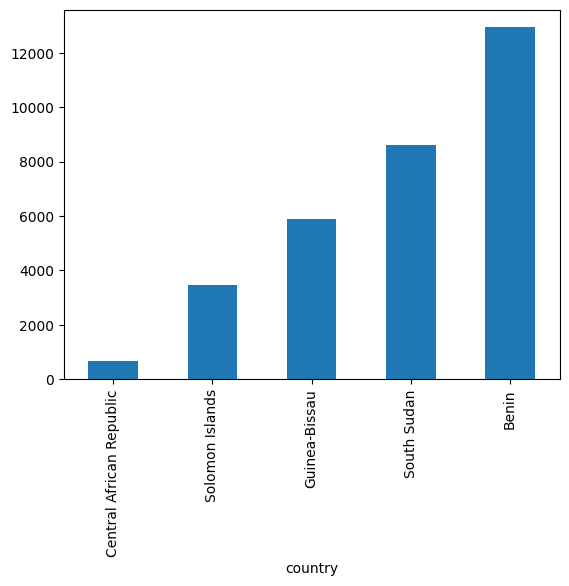

In [25]:
grouped_cases = covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');


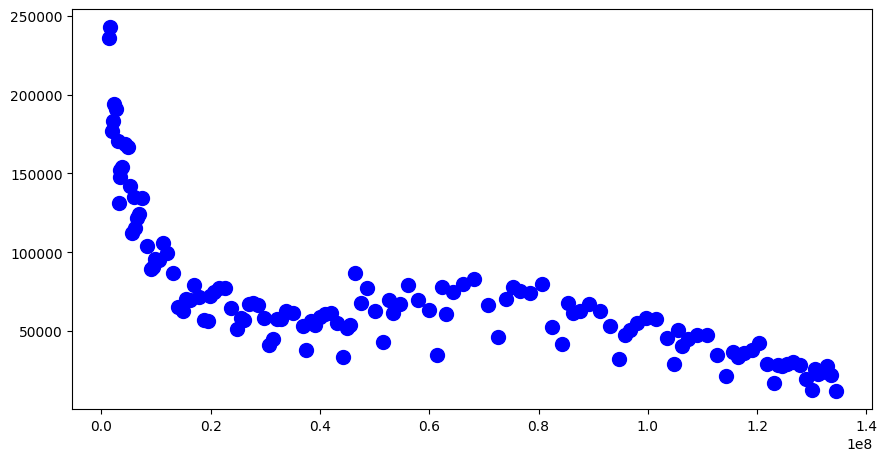

In [28]:
us_data = covid_df[covid_df['country']=='United States']
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

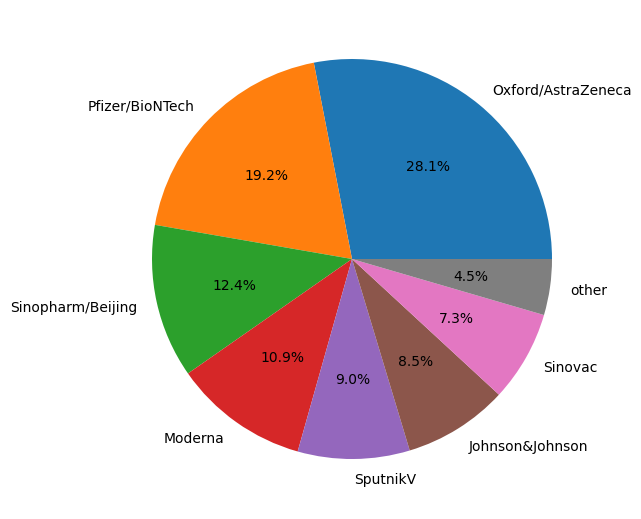

In [33]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

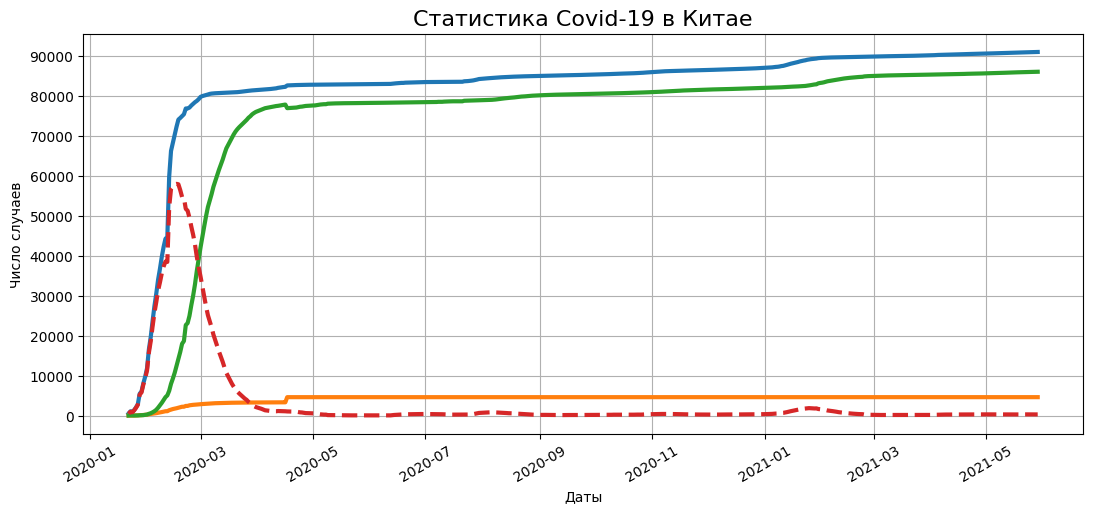

In [36]:
china_data = covid_df[covid_df['country']=='China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();




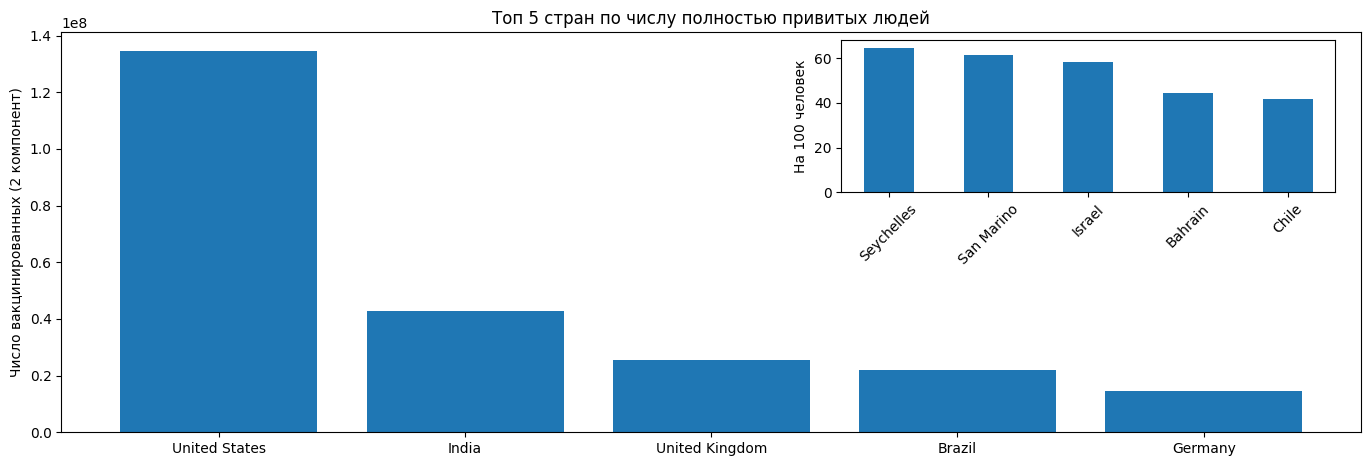

In [41]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

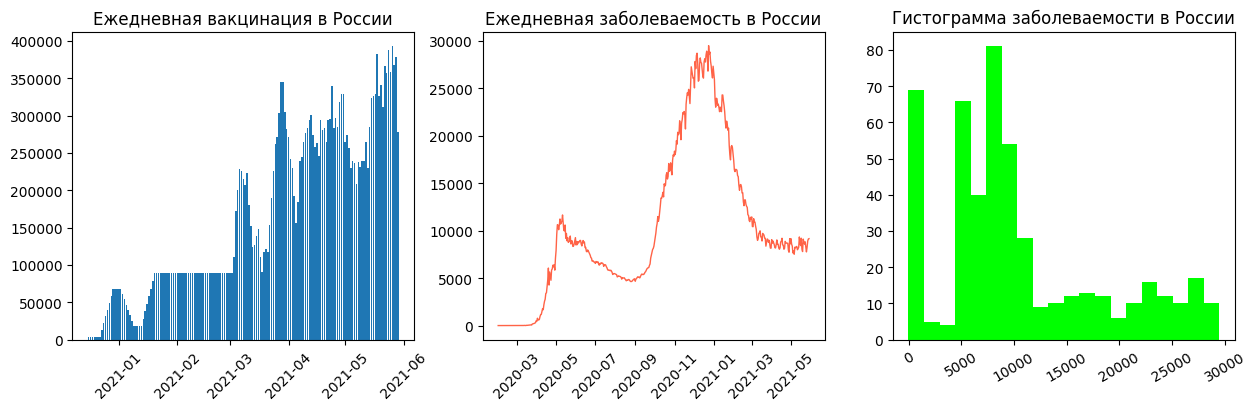

In [48]:
russia_data = covid_df[covid_df['country']=='Russia']

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

#линейный график
axes[1].plot(russia_data['date'], russia_data['daily_confirmed'], label='Число заболевших', color = 'tomato', lw = 1)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[2].hist(x = russia_data['daily_confirmed'], label = ['Число заболевших'], color = 'lime', bins = 20)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)


In [50]:
import seaborn as sns
print(sns.__version__)

0.12.2


In [51]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

In [52]:
populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

In [53]:
croped_covid_df = croped_covid_df.merge(populations, on = 'country')
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

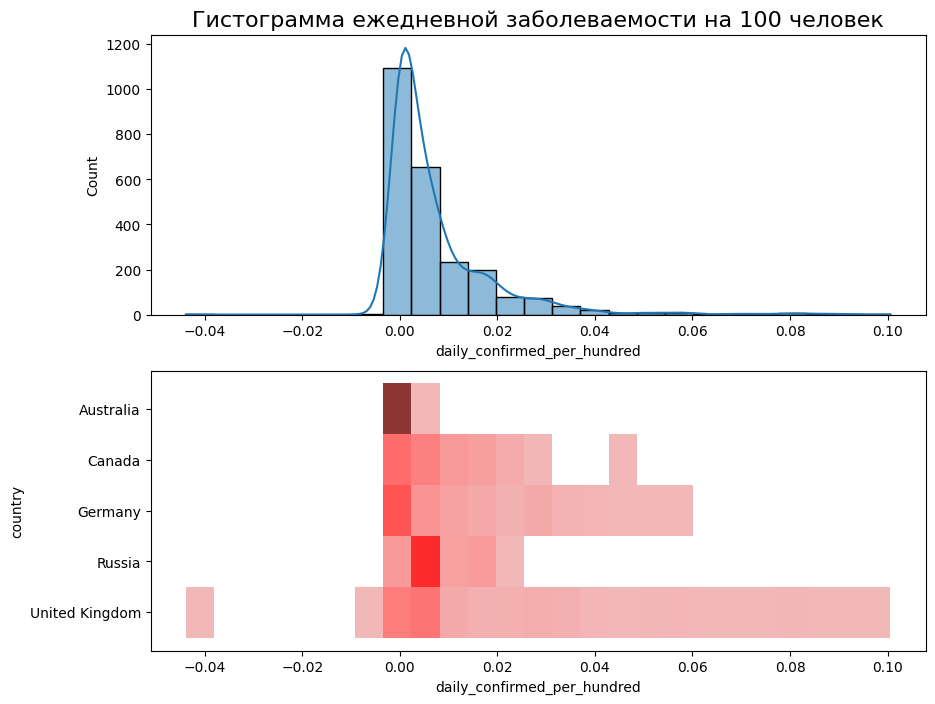

In [55]:
fig, axes = plt.subplots(nrows = 2, ncols=1, figsize = (10,8))
sns.histplot(data = croped_covid_df, x = 'daily_confirmed_per_hundred', bins = 25, kde = True, ax = axes[0]);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize = 16)
sns.histplot(data = croped_covid_df, x = 'daily_confirmed_per_hundred', y = 'country', bins = 25, color = 'red', ax = axes[1]);

AttributeError: 'Axes' object has no attribute 'set_tittle'

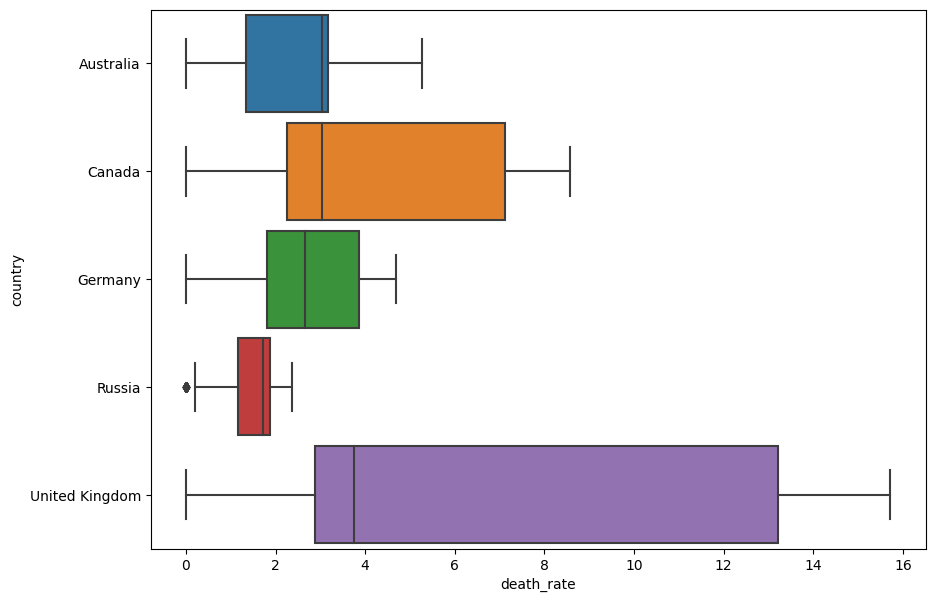

In [58]:
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(data = croped_covid_df, y = 'country', x = 'death_rate', orient = 'h', width = 0.9)
boxplot.set_tittle('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

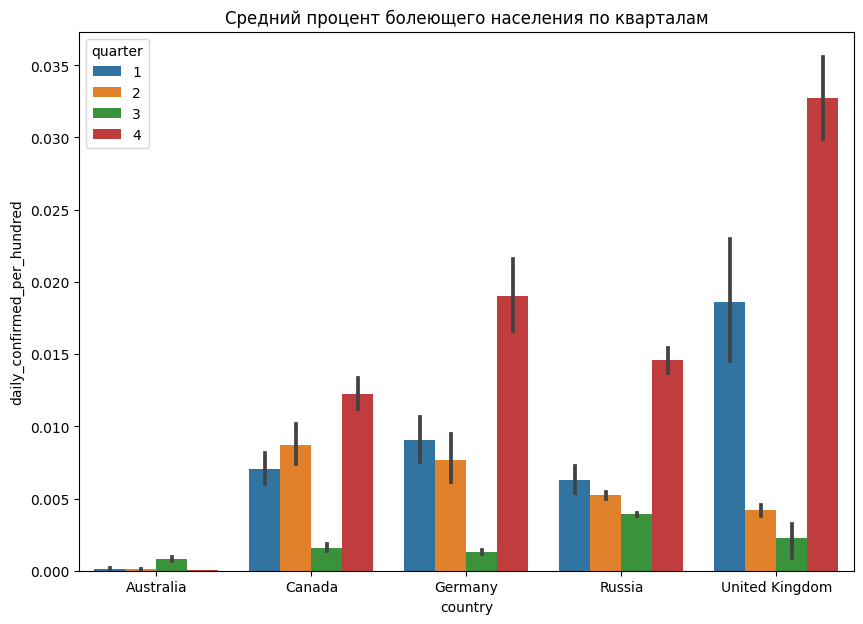

In [59]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

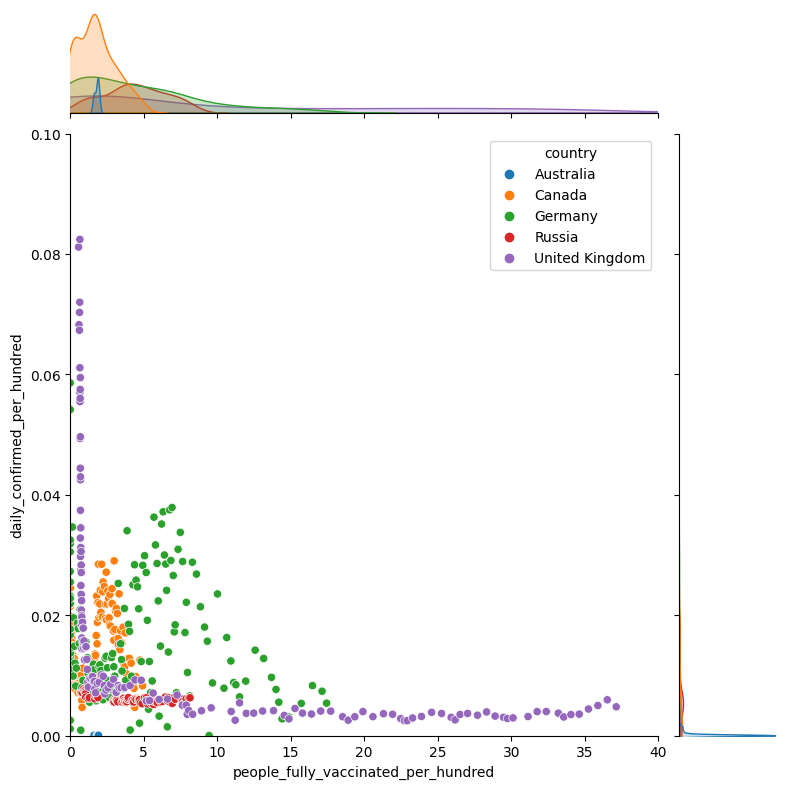

In [60]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [61]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date            2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                 NaN         0.0        0.00        0.01        0.02   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN        0.02         NaN         NaN   
United Kingdom        0.13         NaN         NaN         NaN         NaN   

date            2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                0.03        0.03        0.03        0.05        0.07   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN         NaN         NaN        0.04   
United Kingdom         NaN         NaN        0.99         NaN         NaN   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...         NaN         NaN         NaN         NaN   
Canada          ...       48.10       49.25       50.14       50.89   
Germany         ...       39.18       39.68       39.95       40.11   
Russia          ...       10.20       10.30       10.50       10.53   
United Kingdom  ...       55.01       55.33       55.63       55.82   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia            12.40       12.69       12.88       13.28       13.73   
Canada               51.77       52.39       53.05       53.95       54.99   
Germany              40.29       40.64       41.29       41.87       42.40   
Russia               10.70       10.81       11.07       11.12       11.19   
United Kingdom       55.99       56.27       56.61       56.99       57.29   

date            2021-05-29  
country                     
Australia            14.18  
Canada               55.71  
Germany              42.61  
Russia               11.29  
United Kingdom       57.56  

[5 rows x 168 columns]

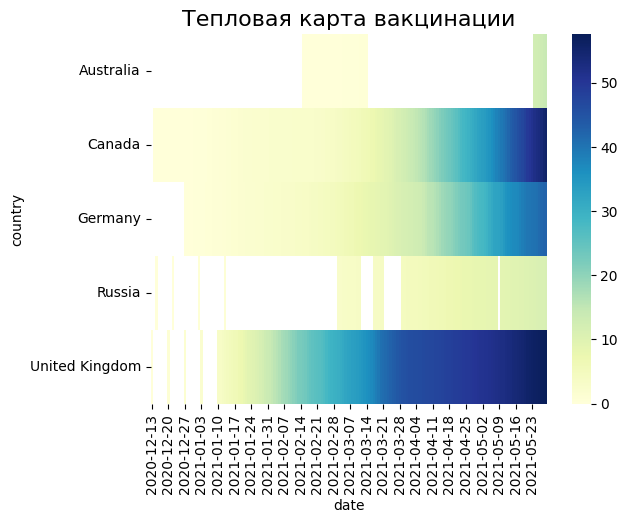

In [62]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

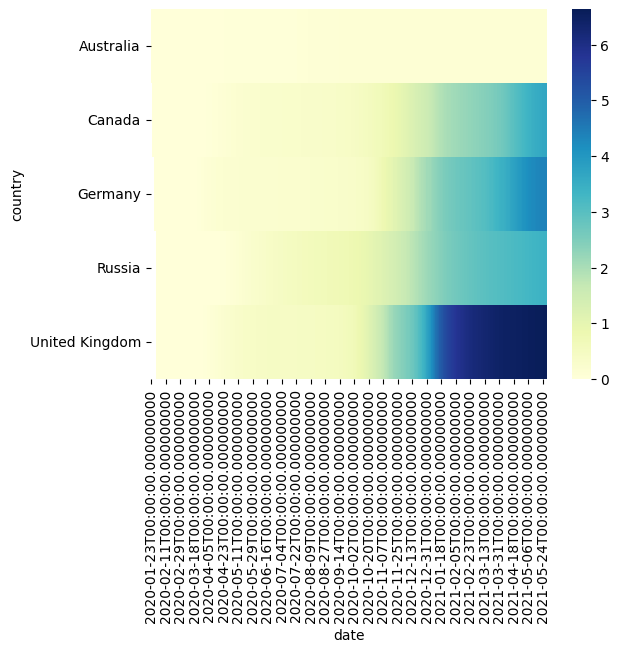

In [66]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population']*100
croped_covid_df.head()
pivot1 = croped_covid_df.pivot_table(values = 'confirmed_per_hundred', columns = 'date', index = 'country')
pivot.columns = pivot.columns.astype('string')

heat = sns.heatmap(data = pivot1, cmap='YlGnBu')

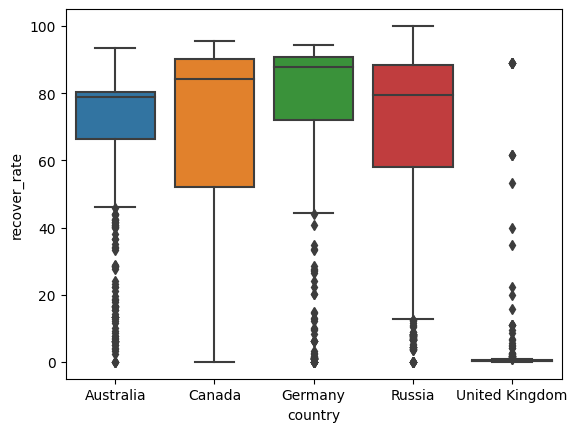

In [68]:
box = sns.boxplot(data = croped_covid_df, x = 'country', y = 'recover_rate')

In [69]:
! pip install plotly

In [71]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.14.1


In [76]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

C:\Users\tanya\AppData\Local\Temp\ipykernel_21976\2057486130.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



ValueError: All arguments should have the same length. The length of argument `y` is 4, whereas the length of  previously-processed arguments ['date'] is 494

In [73]:
#считаем средний процент выздоровлений для каждой страны
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

#отображаем его
fig.show()

In [74]:
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['country'], #категориальный признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=1000, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем график
fig.show()

In [81]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y='daily_vaccinations', #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()


C:\Users\tanya\AppData\Local\Temp\ipykernel_21976\351315305.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [84]:
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()